In [1]:
import pickle

In [2]:
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))
print("Loaded model from: pima.pickle.dat")

Loaded model from: pima.pickle.dat


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [4]:
data = pd.read_csv("titanic.csv")

In [5]:
data = data[['Pclass', 'Sex', 'Age', 'Survived','Parch','SibSp']]

In [6]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [7]:
data = data.dropna()

In [8]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
y_pred = loaded_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))


Accuracy: 83.80%
Recall: 76.12%
Precision: 79.69%
F1: 77.86%


In [19]:
confusion_matrix(y_test, y_pred)

array([[99, 13],
       [16, 51]])

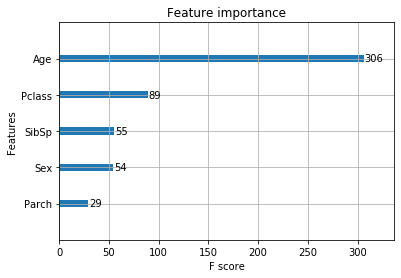

In [14]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(loaded_model)
pyplot.show()